Chage the Runtime to hardware accelerator-T4 Gpu


In [1]:
#set the original path of the data to both train n test
data_path='/content/drive/MyDrive/CNN Projects/chest-xray-multi-class'
#path of the train data
train_data='/content/drive/MyDrive/CNN Projects/chest-xray-multi-class/train'
#path of test data
test_data='/content/drive/MyDrive/CNN Projects/chest-xray-multi-class/test'


In [2]:
import numpy as np
#set the size of the image uniformly
image_hieght,image_width=[150,200]

In [3]:
#to check the number of subfolders in side a folder use glob
import glob
from glob import glob
#number of subfolders in train data
glob('/content/drive/MyDrive/CNN Projects/chest-xray-multi-class/train/*')


['/content/drive/MyDrive/CNN Projects/chest-xray-multi-class/train/NORMAL',
 '/content/drive/MyDrive/CNN Projects/chest-xray-multi-class/train/PNEUMONIA',
 '/content/drive/MyDrive/CNN Projects/chest-xray-multi-class/train/COVID19']

In [4]:
glob('/content/drive/MyDrive/CNN Projects/chest-xray-multi-class/test/*')

['/content/drive/MyDrive/CNN Projects/chest-xray-multi-class/test/COVID19',
 '/content/drive/MyDrive/CNN Projects/chest-xray-multi-class/test/NORMAL',
 '/content/drive/MyDrive/CNN Projects/chest-xray-multi-class/test/PNEUMONIA']

## Import Necessary packages
## ImageDataGenerator


*   import tensorflow
*   from tensorflow import keras
*   from tensorflow.keras.preprocessing.image import ImageDataGenerator






In [5]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
#preprocessing the train data
preprocess_train_data = ImageDataGenerator(rescale = 1./255,
                                           shear_range = 0.2,
                                           horizontal_flip = True,
                                           zoom_range = 0.2)

In [7]:
#preprocessing the test data
preprocess_test_data = ImageDataGenerator(rescale = 1./255)

In [8]:
#labels contains folder names to train and test
#note that the labels name should be same as that of the folder name in test/train data
labels = ['COVID19','NORMAL','PNEUMONIA']


Traning the data

preprocess_train_data=
flow_from_directory( path of traindata,
size of the image,
classes='labels'
class mode='categorical' for multi label data
batch size=30)

In [9]:
training_data = preprocess_train_data.flow_from_directory(train_data , target_size = (image_hieght,image_width) , classes = labels , class_mode = 'categorical' , batch_size = 20)



Found 4735 images belonging to 3 classes.


In [10]:
testing_data =  preprocess_test_data.flow_from_directory(test_data , target_size = (image_hieght,image_width) , classes = labels , class_mode = 'categorical' , batch_size = 20)

Found 1282 images belonging to 3 classes.


## Developping the Architecture

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.activations import sigmoid,relu,softmax

(1725, 1999, 3)


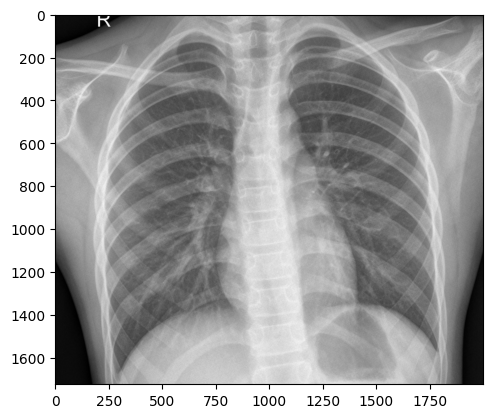

In [12]:
import matplotlib.pyplot as plt
img = plt.imread('/content/drive/MyDrive/CNN Projects/chest-xray-multi-class/train/NORMAL/1.jpg')
plt.imshow(img)
print(img.shape)

In [13]:
model=Sequential()
#First kernel and Maxpool layer
model.add(Conv2D(400, kernel_size = (3,3) ,input_shape=(image_hieght,image_width,3) ,padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
#second kernel and Maxpool layer
model.add(Conv2D(300,kernel_size=(3,3),padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
#Third kernel and Maxpool layer
model.add(Conv2D(200,kernel_size=(3,3),padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
#Fourth kernel and Maxpool layer
model.add(Conv2D(100,kernel_size=(3,3),padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
#fifth kernel and Maxpool layer
model.add(Conv2D(50,kernel_size=(3,3),padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
#sixth kernel and Maxpool layer
model.add(Conv2D(25,kernel_size=(3,3),padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
#seventh kernel and Maxpool layer
model.add(Conv2D(6,kernel_size=(3,3),padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten()) # convet into 1D Array
# the 1D data array is given to ANN
model.add(Dense(32,activation='relu')) # hidden layer 1
model.add(Dense(16,activation = 'relu')) # hidden layer 2
# output layer
model.add(Dense(3,activation='softmax'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 200, 400)     11200     
                                                                 
 max_pooling2d (MaxPooling2  (None, 75, 100, 400)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 100, 300)      1080300   
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 37, 50, 300)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 50, 200)       540200    
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 18, 25, 200)       0

In [15]:
#After model summary,compile the model
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy',metrics = ['Accuracy'])

In [16]:
#the next step is to fit the data in the model

model.fit(training_data , epochs = 20)

Epoch 1/20
237/237 [==============================] - 142s 504ms/step - loss: 0.7637 - Accuracy: 0.6923
Epoch 2/20
237/237 [==============================] - 121s 510ms/step - loss: 0.4261 - Accuracy: 0.8359
Epoch 3/20
237/237 [==============================] - 106s 445ms/step - loss: 0.3183 - Accuracy: 0.8767
Epoch 4/20
237/237 [==============================] - 107s 453ms/step - loss: 0.2805 - Accuracy: 0.9020
Epoch 5/20
237/237 [==============================] - 107s 449ms/step - loss: 0.2651 - Accuracy: 0.9020
Epoch 6/20
237/237 [==============================] - 108s 454ms/step - loss: 0.2301 - Accuracy: 0.9166
Epoch 7/20
237/237 [==============================] - 105s 442ms/step - loss: 0.2281 - Accuracy: 0.9246
Epoch 8/20
237/237 [==============================] - 106s 447ms/step - loss: 0.2075 - Accuracy: 0.9250
Epoch 9/20
237/237 [==============================] - 107s 451ms/step - loss: 0.1884 - Accuracy: 0.9352
Epoch 10/20
237/237 [==============================] - 106s 449m

In [17]:
# Predicting the model on preprocessed test data
predict_test= model.predict(testing_data)

65/65 [==============================] - 19s 296ms/step


In [18]:
#to create a validation report--1.get the classes--2
testing_data.classes

array([0, 0, 0, ..., 2, 2, 2], dtype=int32)

In [19]:
print(predict_test)

[[3.6011310e-04 9.8498386e-01 1.4656082e-02]
 [7.7313751e-05 1.2127792e-05 9.9991059e-01]
 [8.4440003e-04 9.7452193e-01 2.4633572e-02]
 ...
 [3.4506051e-05 2.7236846e-04 9.9969316e-01]
 [2.4100728e-03 1.8082702e-04 9.9740916e-01]
 [3.5363678e-03 3.9049559e-03 9.9255872e-01]]


In [20]:
predicted_points = np.argmax(predict_test  , axis = 1)
predicted_points

array([1, 2, 1, ..., 2, 2, 2])

In [21]:
#import Sklearn to find metrics
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix

In [22]:
#accuracy score
accuracy_score(testing_data.classes , predicted_points)

0.514820592823713

In [23]:
confusion_matrix(testing_data.classes , predicted_points)

array([[  8,  24,  84],
       [ 33,  74, 210],
       [ 75, 196, 578]])

In [24]:
print(classification_report(testing_data.classes , predicted_points))


              precision    recall  f1-score   support

           0       0.07      0.07      0.07       116
           1       0.25      0.23      0.24       317
           2       0.66      0.68      0.67       849

    accuracy                           0.51      1282
   macro avg       0.33      0.33      0.33      1282
weighted avg       0.51      0.51      0.51      1282



Testing with unseen data


In [25]:
#import cv2 package
import cv2
#get the labels
labels

['COVID19', 'NORMAL', 'PNEUMONIA']

In [26]:
#create a function to take image from its path

def Prediction(path):      #create function
  image=plt.imread(path)   #read the image from path
  print(image.shape)       #print the shape of the image
  image=cv2.resize(image,(200,150)) # initially image size id fixed to the dimensions
  image = np.array(image) / 255.0   # since the training was done with pixel values after scaling down to 0 - 1 so for test also we need to scale down into 0 - 1
  image = np.expand_dims(image , axis = 0)
  print(image.shape)#need to make sure convert data into Deep learning CNN trained Manner
  result = model.predict(image)  # the predicted image is in the variable result
  print(result)
  sol = np.argmax(result , axis = 1) #
  print(sol[0])
  print(labels[sol[0]])
  img = plt.imread(path)
  plt.imshow(img)

(2155, 2443, 3)
(1, 150, 200, 3)
1/1 [==============================] - 1s 515ms/step
[[0.30459416 0.6587261  0.03667974]]
1
NORMAL


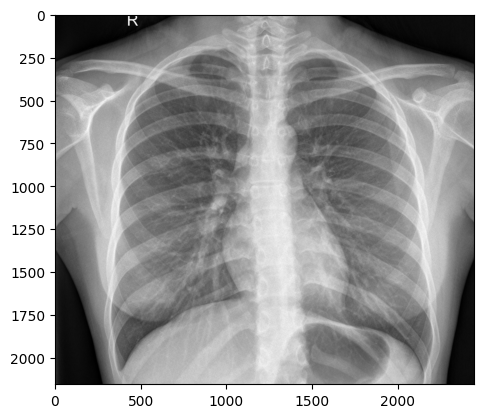

In [27]:
Prediction('/content/drive/MyDrive/CNN Projects/chest-xray-multi-class/pred/N(10).jpg')

(1971, 2498, 3)
(1, 150, 200, 3)
1/1 [==============================] - 0s 19ms/step
[[0.8557225  0.03735994 0.10691752]]
0
COVID19


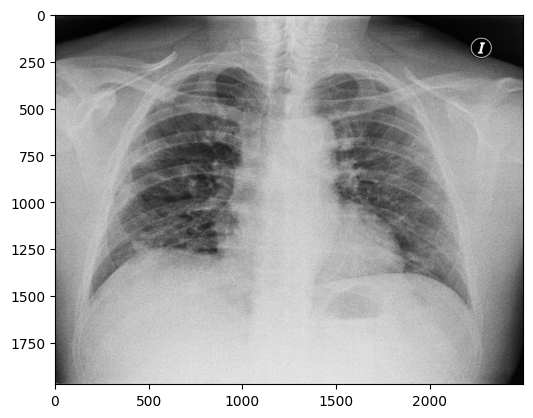

In [28]:
Prediction('/content/drive/MyDrive/CNN Projects/chest-xray-multi-class/pred/c.jpg')

(880, 1120, 3)
(1, 150, 200, 3)
1/1 [==============================] - 0s 19ms/step
[[0.00167162 0.00673969 0.99158865]]
2
PNEUMONIA


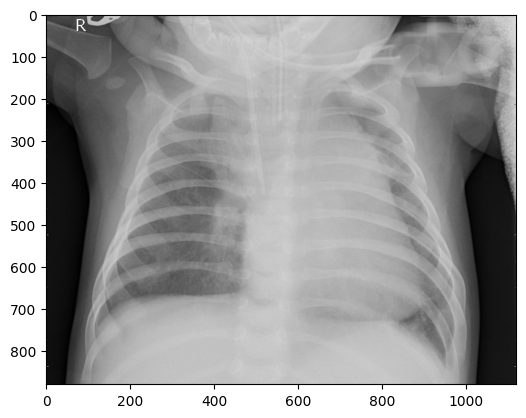

In [29]:
Prediction('/content/drive/MyDrive/CNN Projects/chest-xray-multi-class/pred/p.jpg')